In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# Load data using Pandas
file_path = '/content/drive/MyDrive/final_sample.csv'
df = pd.read_csv(file_path)

#print the dataframe
df.head()

,Hour_of_Day,Day_of_Week,Day_of_Month,Visitor_ID,Visitor_Action,Product,Product_Category,Category_Name_Numeric,Brand,Price,...,Is_Weekend,Day_Period,Product_Popularity,Category_Popularity,Price_Bin,Min_Price,Max_Price,Avg_Price,Day_of_Month_Bins,Visitor_Count_CNN
0,8,2,20,564945,2,112,2,35.68,samsung,170,...,0,morning,189197,9556617,low,36,2562,478.655251,End of Month (21-31),9556617
1,6,4,15,56773,1,47471,other,35.60.82,xgimi,592,...,0,morning,165,2362270,high,10,2574,168.631638,Mid Month (11-20),9293
2,12,6,24,288206,1,1811,2,35.68,oppo,129,...,1,afternoon,18980,9556617,low,36,2562,478.655251,End of Month (21-31),9556617
3,9,0,25,302384,2,84,2,35.68,samsung,126,...,0,morning,406393,9556617,low,36,2562,478.655251,End of Month (21-31),9556617
4,8,4,8,226130,3,3634,62,35.134,huawei,102,...,0,morning,5397,250140,low,46,1902,321.674154,Early Month (1-10),264275


In [3]:
#Check the unique values in the Product Category column
df["Product_Category"].value_counts()

Product_Category
2        999127
other    147174
8        106864
18        99474
4         71924
1         65253
34        63538
16        49080
9         30455
62        19659
36        19553
91        18399
43        14795
72        14325
40        14222
55        14001
21        11989
42        11577
54        11231
84        10819
28        10810
39        10325
56        10282
5         10148
33         9767
64         9340
108        8395
52         8287
49         8241
10         7840
38         7063
60         7024
29         6974
30         6735
26         6348
53         6129
57         5760
22         5725
35         5671
47         5003
58         4889
3          4683
Name: count, dtype: int64

In [4]:
# Sample 10% of the data
df_sampled = df.sample(frac=0.1, random_state=42)
df_sampled.head()

,Hour_of_Day,Day_of_Week,Day_of_Month,Visitor_ID,Visitor_Action,Product,Product_Category,Category_Name_Numeric,Brand,Price,...,Is_Weekend,Day_Period,Product_Popularity,Category_Popularity,Price_Bin,Min_Price,Max_Price,Avg_Price,Day_of_Month_Bins,Visitor_Count_CNN
931032,12,0,11,330177,3,112,2,35.68,samsung,169,...,0,afternoon,189197,9556617,low,36,2562,478.655251,Mid Month (11-20),9556617
580876,7,3,21,362342,3,1369,18,35.60.128,haier,232,...,0,morning,18763,1279232,low,97,2574,458.420782,End of Month (21-31),1286239
86028,4,3,28,372391,1,3322,16,35.85,samsung,412,...,0,night,2619,606126,medium,15,2523,339.377436,End of Month (21-31),952563
1162835,6,4,15,66321,1,4370,other,70.149.97,joie,103,...,0,morning,780,2362270,low,10,2574,168.631638,Mid Month (11-20),67017
1428429,5,1,19,234164,3,1630,2,35.68,huawei,89,...,0,night,16162,9556617,very_low,36,2562,478.655251,Mid Month (11-20),9556617


In [5]:
#Check the unique counts in Product category column in sampled dataframe
df_sampled["Product_Category"].value_counts()

Product_Category
2        99805
other    15002
8        10691
18       10144
4         7077
1         6376
34        6373
16        4857
9         3107
36        1965
62        1963
91        1799
40        1457
43        1457
72        1405
55        1405
21        1155
42        1149
54        1143
28        1119
84        1085
39        1045
56        1006
33        1002
5          990
64         884
108        841
49         812
52         792
10         764
60         715
29         682
38         680
30         675
26         661
53         602
22         600
35         583
57         564
47         525
58         491
3          442
Name: count, dtype: int64

In [6]:
#Check the length of the sampled dataframe
len(df_sampled)

195890

In [7]:
#Check the columns in the dataframe
df_sampled.columns

Index(['Hour_of_Day', 'Day_of_Week', 'Day_of_Month', 'Visitor_ID',
       'Visitor_Action', 'Product', 'Product_Category',
       'Category_Name_Numeric', 'Brand', 'Price', 'Total_Actions_Per_Visitor',
       'Unique_Products_Per_Visitor', 'Avg_Price_Per_Visitor', 'Is_Weekend',
       'Day_Period', 'Product_Popularity', 'Category_Popularity', 'Price_Bin',
       'Min_Price', 'Max_Price', 'Avg_Price', 'Day_of_Month_Bins',
       'Visitor_Count_CNN'],
      dtype='object')

In [8]:
# Delete Unnecessary Columns
columns_to_keep = ['Product', 'Product_Category', 'Brand', 'Price', 'Product_Popularity',
                   'Category_Popularity']
new_df = df_sampled[columns_to_keep]

new_df.head(10)

,Product,Product_Category,Brand,Price,Product_Popularity,Category_Popularity
931032,112,2,samsung,169,189197,9556617
580876,1369,18,haier,232,18763,1279232
86028,3322,16,samsung,412,2619,606126
1162835,4370,other,joie,103,780,2362270
1428429,1630,2,huawei,89,16162,9556617
1879565,12927,36,casio,16,166,344657
1249827,172,8,apple,160,281333,1039659
1025781,13,8,xiaomi,23,78574,1039659
1145681,43,16,apple,454,22901,606126
1406336,210,2,xiaomi,360,3426,9556617


In [9]:
# Ensure new_df is a proper copy if it's a slice from another DataFrame
new_df = new_df.copy()

# Modify the Product_Category column using .loc to avoid the SettingWithCopyWarning
new_df.loc[:, 'Product_Category'] = new_df['Product_Category'].astype(str)

# Check the conversion
print(new_df['Product_Category'].dtype)

object


In [10]:
# Sample the dominant class (2)
dominant_class = new_df[new_df['Product_Category'] == '2']
original_sample_size = len(dominant_class)

#Undersample the dominant class and consider only 15% of the actual value
new_sample_size = max(int(0.15 * original_sample_size), 1)

In [11]:
new_sample_size

14970

In [12]:
from sklearn.utils import resample
# Downsample the dominant class
dominant_class_sampled = resample(dominant_class,
                                  replace=False,
                                  n_samples=new_sample_size,
                                  random_state=42)

print(dominant_class_sampled["Product_Category"].value_counts())

# Combine the sampled dominant class with the rest of the data
remaining_classes = new_df[new_df['Product_Category'] != '2']
balanced_df = pd.concat([dominant_class_sampled, remaining_classes])

# Shuffle the dataset and reset the index
balanced_df = balanced_df.reset_index(drop=True)

#Check the unique value counts in "Product_Category column
balanced_df["Product_Category"].value_counts()

Product_Category
2    14970
Name: count, dtype: int64


Product_Category
other    15002
2        14970
8        10691
18       10144
4         7077
1         6376
34        6373
16        4857
9         3107
36        1965
62        1963
91        1799
40        1457
43        1457
72        1405
55        1405
21        1155
42        1149
54        1143
28        1119
84        1085
39        1045
56        1006
33        1002
5          990
64         884
108        841
49         812
52         792
10         764
60         715
29         682
38         680
30         675
26         661
53         602
22         600
35         583
57         564
47         525
58         491
3          442
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

#Set the features and target variables
X = balanced_df.drop(columns=['Product_Category'])
y = balanced_df['Product_Category']


In [14]:
# Preprocess the X and y variables before training the model

from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
# Convert 'Brand' column to string before encoding
X['Brand'] = X['Brand'].astype(str)
X['Brand'] = label_encoder.fit_transform(X['Brand'])

# Encode other categorical variables
X['Product'] = label_encoder.fit_transform(X['Product'])

# Initialize StandardScaler for numerical features
scaler = StandardScaler()

# Scale numerical features
numerical_features = ['Product_Popularity', 'Category_Popularity']
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Check data types after preprocessing
print(X.dtypes)

Product                  int64
Brand                    int64
Price                    int64
Product_Popularity     float64
Category_Popularity    float64
dtype: object


In [15]:
print(X.dtypes)

Product                  int64
Brand                    int64
Price                    int64
Product_Popularity     float64
Category_Popularity    float64
dtype: object


In [16]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [17]:
# Choose a model and train it
model = RandomForestClassifier(class_weight = 'balanced', random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9997748863175904
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1275
          10       1.00      1.00      1.00       153
         108       1.00      1.00      1.00       168
          16       1.00      1.00      1.00       971
          18       1.00      1.00      1.00      2029
           2       1.00      1.00      1.00      2994
          21       1.00      1.00      1.00       231
          22       1.00      1.00      1.00       120
          26       1.00      1.00      1.00       132
          28       1.00      1.00      1.00       224
          29       1.00      1.00      1.00       136
           3       1.00      1.00      1.00        88
          30       1.00      1.00      1.00       135
          33       1.00      1.00      1.00       200
          34       1.00      1.00      1.00      1275
          35       1.00      1.00      1.00       117
          36       1.00      

## The above classification report shows 100% accuracy across all the metrics.So, next step is to check if the model is overfitting.

In [18]:

# Check if the model is overfitting by comparing its performance on the training and testing sets.

train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 1.0
Test Accuracy: 0.9997748863175904


In [19]:
# Check if your classes are imbalanced and consider using techniques to address it.

class_distribution = balanced_df['Product_Category'].value_counts(normalize=True)
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Product_Category
other    0.135086
2        0.134798
8        0.096268
18       0.091342
4        0.063725
1        0.057413
34       0.057386
16       0.043735
9        0.027977
36       0.017694
62       0.017676
91       0.016199
40       0.013120
43       0.013120
72       0.012651
55       0.012651
21       0.010400
42       0.010346
54       0.010292
28       0.010076
84       0.009770
39       0.009410
56       0.009059
33       0.009023
5        0.008915
64       0.007960
108      0.007573
49       0.007312
52       0.007132
10       0.006879
60       0.006438
29       0.006141
38       0.006123
30       0.006078
26       0.005952
53       0.005421
22       0.005403
35       0.005250
57       0.005079
47       0.004727
58       0.004421
3        0.003980
Name: proportion, dtype: float64


In [21]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Evaluate model performance on training and test sets
train_accuracy = accuracy_score(y_train, model.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("Classification Report on Test Data:")
print(classification_report(y_test, y_pred))

# Generate classification report
report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
report_df = pd.DataFrame(report).transpose()

# Save classification report to CSV
report_df.to_csv('product_classification_report.csv', index=True)


Train Accuracy: 1.0
Test Accuracy: 0.9997748863175904
Classification Report on Test Data:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00      1275
          10       1.00      1.00      1.00       153
         108       1.00      1.00      1.00       168
          16       1.00      1.00      1.00       971
          18       1.00      1.00      1.00      2029
           2       1.00      1.00      1.00      2994
          21       1.00      1.00      1.00       231
          22       1.00      1.00      1.00       120
          26       1.00      1.00      1.00       132
          28       1.00      1.00      1.00       224
          29       1.00      1.00      1.00       136
           3       1.00      1.00      1.00        88
          30       1.00      1.00      1.00       135
          33       1.00      1.00      1.00       200
          34       1.00      1.00      1.00      1275
          35       1.00      1.00      1.00  

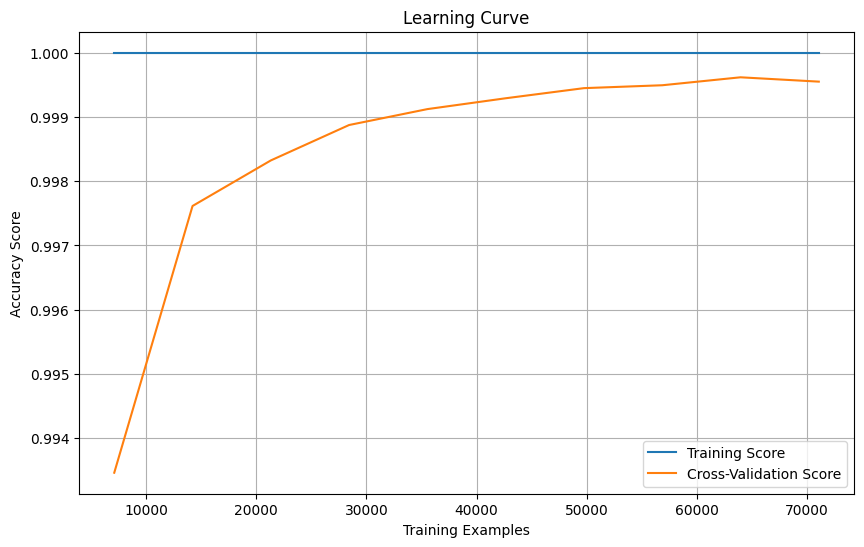

In [22]:
# Plot learning curve to check if the data is overfitting
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

# The above graph is an indicator for potential overfitting as the training score and cross-Validation Score lines are not followng the same trend. So, optimising the model is required.

### Attempt 1: Optimising the model by setting up the hyper parameters manually to address the overfitting  problem and improve the performance of the model

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Define the model with regularization parameters
model = RandomForestClassifier(max_depth=10, min_samples_split=5, min_samples_leaf=2, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model
train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 0.8965039845121786
Test Accuracy: 0.8945117284228535


In [27]:
from sklearn.metrics import classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Generate classification report
optimised_report = classification_report(y_test, y_pred, output_dict=True)

# Convert classification report to DataFrame
optimised_report_df = pd.DataFrame(optimised_report).transpose()

# Save classification report to CSV
optimised_report_df.to_csv('classification_report_optimised.csv', index=True)

# Print optimised report
print("Optimised Classification Report:")
print(optimised_report_df)


Optimised Classification Report:
              precision    recall  f1-score       support
1              0.998434  1.000000  0.999216   1275.000000
10             0.923077  0.313725  0.468293    153.000000
108            1.000000  0.011905  0.023529    168.000000
16             0.998968  0.996910  0.997938    971.000000
18             1.000000  1.000000  1.000000   2029.000000
2              1.000000  1.000000  1.000000   2994.000000
21             0.506608  0.995671  0.671533    231.000000
22             1.000000  0.366667  0.536585    120.000000
26             1.000000  0.060606  0.114286    132.000000
28             0.625714  0.977679  0.763066    224.000000
29             1.000000  0.088235  0.162162    136.000000
3              1.000000  0.102273  0.185567     88.000000
30             0.722689  0.637037  0.677165    135.000000
33             0.465278  0.335000  0.389535    200.000000
34             0.993765  1.000000  0.996873   1275.000000
35             1.000000  0.162393  0.27

## From the above Classification_Report, even though the accuracy is 89%, the recall and f1 scores are less indicating that the hyperparameters are required further tuning to improve the performance of the model.

## Attempt 2: Using GridSearchCV method to tune the parameters

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [3, 6, 9],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3]
}

# Create the grid search object
grid_search = GridSearchCV(RandomForestClassifier(class_weight='balanced', random_state=42), param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Print classification report
print("Classification Report (Train):")
print(classification_report(y_train, y_train_pred))

print("Classification Report (Test):")
print(classification_report(y_test, y_test_pred))


Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Train Accuracy: 0.9498671829273784
Test Accuracy: 0.94709828463374
Classification Report (Train):
              precision    recall  f1-score   support

           1       0.99      0.94      0.96      5101
          10       1.00      0.97      0.98       611
         108       1.00      0.93      0.96       673
          16       1.00      0.86      0.93      3886
          18       0.99      0.97      0.98      8115
           2       1.00      0.99      1.00     11976
          21       0.88      1.00      0.94       924
          22       1.00      1.00      1.00       480
          26       1.00      1.00      1.00       529
          28       0.86      0.99      0.92       895
          29       1.00      1.00      1.00       546
           3       1.00      1.00      1.00       354
          30       1.00      1.00      1.00       540
          33       0.99      0.95      0.97       802
     

In [29]:
# Generate classification report for test data with output_dict=True
optimised_report_2 = classification_report(y_test, y_test_pred, output_dict=True)

# Convert classification report to DataFrame
optimised_report_df_2 = pd.DataFrame(optimised_report_2).transpose()

# Save classification report to CSV
optimised_report_df_2.to_csv('classification_report_optimised_2.csv', index=True)


# Using GridSearchCV has improved the model performance by 6% and also there is a drastic improvement in recall and f1 scores. Plotting the graph for the training and testing scores will further provide if the model is still having any overfitting issues.

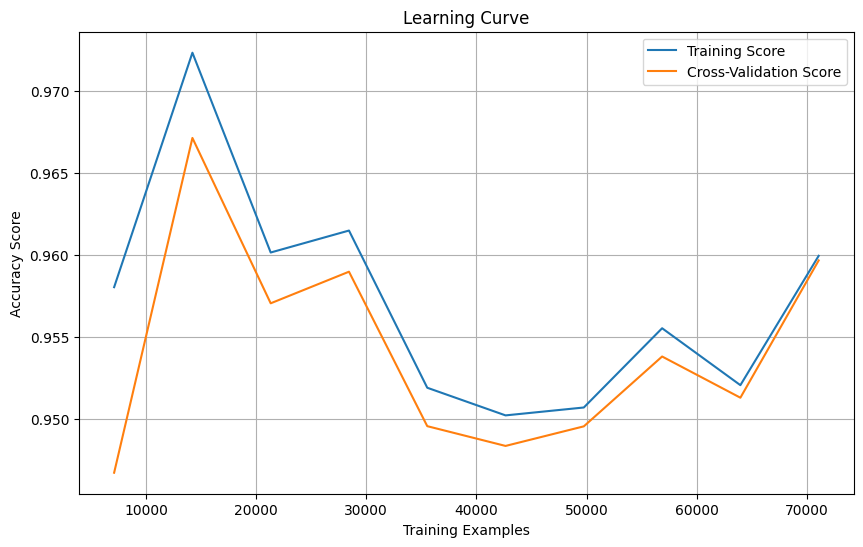

In [30]:
# Plot learning curve
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-Validation Score')
plt.title('Learning Curve')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

 ## This graph shows that both the training and cross-validation curves follow a similar trend, rising or falling together as the number of training examples increases, it suggests that the model is generalizing well to unseen data. This model is performing well on both the training and testing data.

In [14]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(feature_importance_df)

               Feature  Importance
4  Category_Popularity    0.580445
3   Product_Popularity    0.125326
0              Product    0.100451
1                Brand    0.098005
2                Price    0.092081
6           Day_Period    0.002587
5           Is_Weekend    0.001105
